### Problem Statement:

Build a regression model to predict the compressive strength of concrete based on the the given features in the dataset.

### Importing necessary libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#load the data:
df = pd.read_excel('Concrete_Data.xls')
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [4]:
df.shape

(1030, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
Cement (component 1)(kg in a m^3 mixture)                1030 non-null float64
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    1030 non-null float64
Fly Ash (component 3)(kg in a m^3 mixture)               1030 non-null float64
Water  (component 4)(kg in a m^3 mixture)                1030 non-null float64
Superplasticizer (component 5)(kg in a m^3 mixture)      1030 non-null float64
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     1030 non-null float64
Fine Aggregate (component 7)(kg in a m^3 mixture)        1030 non-null float64
Age (day)                                                1030 non-null int64
Concrete compressive strength(MPa, megapascals)          1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


### Checking null values:

In [6]:
df.isnull().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

In [7]:
df.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [8]:
df=df.rename(columns={'Cement (component 1)(kg in a m^3 mixture)':'Cement','Blast Furnace Slag (component 2)(kg in a m^3 mixture)':'Blast_Slag','Concrete compressive strength(MPa, megapascals) ':'Strength'})

In [9]:
cor=df.corr()

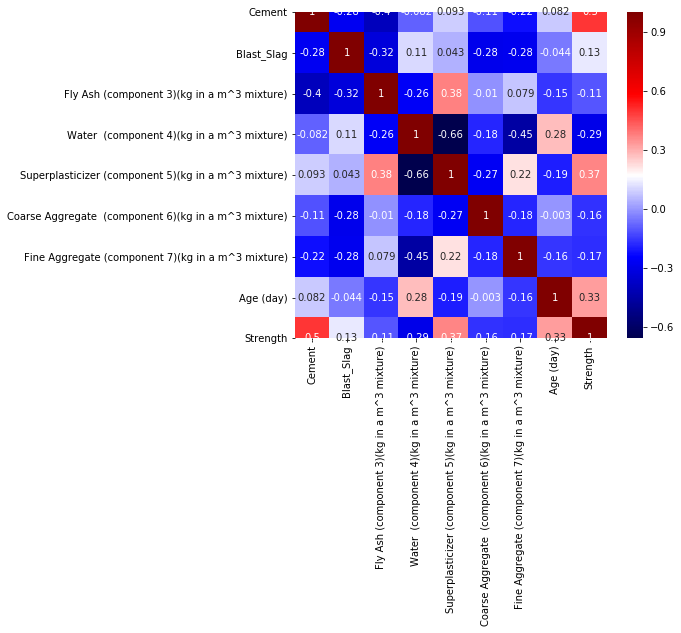

In [10]:
plt.figure(figsize=(7,6))
sns.heatmap(cor,annot=True,cmap='seismic')

### Checking correlation with target variable:

In [11]:
cor_target=abs(cor['Strength'])

In [12]:
Main_features=cor_target[cor_target>0.1]
Main_features

Cement                                                  0.497833
Blast_Slag                                              0.134824
Fly Ash (component 3)(kg in a m^3 mixture)              0.105753
Water  (component 4)(kg in a m^3 mixture)               0.289613
Superplasticizer (component 5)(kg in a m^3 mixture)     0.366102
Coarse Aggregate  (component 6)(kg in a m^3 mixture)    0.164928
Fine Aggregate (component 7)(kg in a m^3 mixture)       0.167249
Age (day)                                               0.328877
Strength                                                1.000000
Name: Strength, dtype: float64

### Standard Scaling

In [13]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaled=pd.DataFrame(sc.fit_transform(df),columns=df.columns)

In [14]:
scaled.describe()

,Cement,Blast_Slag,Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),Strength
count,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03
mean,4.335798e-17,-1.117607e-15,1.267056e-15,5.503688e-16,3.987102e-16,-9.011131e-17,-4.575358e-16,1.534910e-16,4.486163e-16
std,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00
min,-1.715219e+00,-8.568863e-01,-8.471320e-01,-2.802333e+00,-1.038944e+00,-2.212137e+00,-2.240913e+00,-7.073594e-01,-2.005443e+00
25%,-8.500258e-01,-8.568863e-01,-8.471320e-01,-7.808013e-01,-1.038944e+00,-5.265140e-01,-5.319534e-01,-6.123314e-01,-7.252985e-01
50%,-7.912996e-02,-6.017760e-01,-8.471320e-01,1.608624e-01,2.460198e-02,-6.328926e-02,7.401267e-02,-2.797331e-01,-8.235105e-02
75%,6.589771e-01,8.007508e-01,1.001836e+00,4.888051e-01,6.627297e-01,7.267662e-01,6.291904e-01,1.637312e-01,6.179613e-01
max,2.477918e+00,3.310688e+00,2.281122e+00,3.065497e+00,4.354156e+00,2.214232e+00,2.733101e+00,5.057677e+00,2.801689e+00


### Raw linear regression model

In [15]:
X = df.drop('Strength', axis=1)
y= df['Strength']
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

print(f'Coefficients: {lin_reg.coef_}')
print(f'Intercept: {lin_reg.intercept_}')
print(f'R^2 score: {lin_reg.score(X, y)}')

Coefficients: [ 0.11978526  0.10384725  0.08794308 -0.1502979   0.29068694  0.01803018
  0.02015446  0.11422562]
Intercept: -23.16375581107919
R^2 score: 0.6154647342687214


In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 1)
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)

(721, 8)
(309, 8)
(309,)


In [17]:
lin_reg = LinearRegression()
model = lin_reg.fit(X_train,y_train)
print(f'R^2 score for train: {lin_reg.score(X_train, y_train)}')
print(f'R^2 score for test: {lin_reg.score(X_test, y_test)}')

R^2 score for train: 0.6411304739211958
R^2 score for test: 0.5414363184391054


In [18]:
import warnings 
warnings.filterwarnings('ignore')
import statsmodels.api as sm

X_constant = sm.add_constant(X)
lin_reg = sm.OLS(y,X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Strength   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     204.3
Date:                Sun, 30 Aug 2020   Prob (F-statistic):          6.76e-206
Time:                        23:05:47   Log-Likelihood:                -3869.0
No. Observations:                1030   AIC:                             7756.
Df Residuals:                    1021   BIC:                             7800.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                  -23.1638     26.588     -0.871      0.384     -75.338      29.010
Cement                                                   0.1198      0.008     14.110      0.000       0.103       0.136
Blast_Slag                                               0.1038      0.010     10.245      0.000       0.084       0.124
Fly Ash (component 3)(kg in a m^3 mixture)               0.0879      0.013      6.988      0.000       0.063       0.113
Water  (component 4)(kg in a m^3 mixture)               -0.1503      0.040     -3.741      0.000      -0.229      -0.071
Superplasticizer (component 5)(kg in a m^3 mixture)      0.2907      0.093      3.110      0.002       0.107       0.474
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0.0180      0.009      1.919      0.055      -0.000       0.036
Fine Aggregate (component 7)(kg in a m^3 mixture)        0.0202      0.011      1.883      0.060      -0.001       0.041
Age (day)                                                0.1142      0.005     21.046      0.000       0.104       0.125
==============================================================================
Omnibus:                        5.379   Durbin-Watson:                   1.281
Prob(Omnibus):                  0.068   Jarque-Bera (JB):                5.305
Skew:                          -0.174   Prob(JB):                       0.0705
Kurtosis:                       3.045   Cond. No.                     1.06e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
df1=df.copy()

### Checking skewness of the dataset:

In [20]:
df1.skew()

Cement                                                  0.509517
Blast_Slag                                              0.800737
Fly Ash (component 3)(kg in a m^3 mixture)              0.537445
Water  (component 4)(kg in a m^3 mixture)               0.074324
Superplasticizer (component 5)(kg in a m^3 mixture)     0.908113
Coarse Aggregate  (component 6)(kg in a m^3 mixture)   -0.040206
Fine Aggregate (component 7)(kg in a m^3 mixture)      -0.252979
Age (day)                                               3.269177
Strength                                                0.416922
dtype: float64

### Applying boxcox transformation to reduce the skewness from the dataset:

In [21]:
l=[]
for i in df1.columns:
    if ((df1[i].skew()<0.1) or (df1[i].skew()>0.2) and (i!='Strength')):
        l.append(i)
l

['Cement',
 'Blast_Slag',
 'Fly Ash (component 3)(kg in a m^3 mixture)',
 'Water  (component 4)(kg in a m^3 mixture)',
 'Superplasticizer (component 5)(kg in a m^3 mixture)',
 'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
 'Fine Aggregate (component 7)(kg in a m^3 mixture)',
 'Age (day)']

In [22]:
import scipy.stats as st
for i in df1.columns:
    if i in l:
        df1[i]=list(st.boxcox(df1[i]+1)[0])
df1.skew()

Cement                                                 -0.018917
Blast_Slag                                             -0.025041
Fly Ash (component 3)(kg in a m^3 mixture)              0.215250
Water  (component 4)(kg in a m^3 mixture)               0.003247
Superplasticizer (component 5)(kg in a m^3 mixture)    -0.160856
Coarse Aggregate  (component 6)(kg in a m^3 mixture)   -0.018444
Fine Aggregate (component 7)(kg in a m^3 mixture)      -0.012544
Age (day)                                              -0.000234
Strength                                                0.416922
dtype: float64

In [23]:
df1['Superplasticizer (component 5)(kg in a m^3 mixture)'].transform(lambda x:x**4)

0         4.859254
1         4.859254
2         0.000000
3         0.000000
4         0.000000
           ...    
1025     98.453684
1026    135.723840
1027     43.428621
1028    160.460140
1029     91.622074
Name: Superplasticizer (component 5)(kg in a m^3 mixture), Length: 1030, dtype: float64

In [24]:
df1.skew()

Cement                                                 -0.018917
Blast_Slag                                             -0.025041
Fly Ash (component 3)(kg in a m^3 mixture)              0.215250
Water  (component 4)(kg in a m^3 mixture)               0.003247
Superplasticizer (component 5)(kg in a m^3 mixture)    -0.160856
Coarse Aggregate  (component 6)(kg in a m^3 mixture)   -0.018444
Fine Aggregate (component 7)(kg in a m^3 mixture)      -0.012544
Age (day)                                              -0.000234
Strength                                                0.416922
dtype: float64

In [25]:
df2=df.copy()

In [26]:
df2=df2.transform(lambda x:x**2)

In [27]:
X =df2.drop('Strength',axis=1)
y =df2.Strength
X_constant = sm.add_constant(X)
model = sm.OLS(y, X_constant).fit()
predictions = model.predict(X_constant)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Strength   R-squared:                       0.448
Model:                            OLS   Adj. R-squared:                  0.444
Method:                 Least Squares   F-statistic:                     103.8
Date:                Sun, 30 Aug 2020   Prob (F-statistic):          2.40e-126
Time:                        23:05:47   Log-Likelihood:                -8583.8
No. Observations:                1030   AIC:                         1.719e+04
Df Residuals:                    1021   BIC:                         1.723e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                 8775.4611    906.025      9.686      0.000    6997.577    1.06e+04
Cement                                                   0.0064      0.001      7.212      0.000       0.005       0.008
Blast_Slag                                               0.0046      0.003      1.683      0.093      -0.001       0.010
Fly Ash (component 3)(kg in a m^3 mixture)              -0.0146      0.006     -2.602      0.009      -0.026      -0.004
Water  (component 4)(kg in a m^3 mixture)               -0.1003      0.008    -12.794      0.000      -0.116      -0.085
Superplasticizer (component 5)(kg in a m^3 mixture)     -0.1215      0.350     -0.347      0.728      -0.808       0.565
Coarse Aggregate  (component 6)(kg in a m^3 mixture)    -0.0025      0.000     -7.444      0.000      -0.003      -0.002
Fine Aggregate (component 7)(kg in a m^3 mixture)       -0.0035      0.001     -6.984      0.000      -0.004      -0.003
Age (day)                                                0.0148      0.002      8.931      0.000       0.012       0.018
==============================================================================
Omnibus:                       86.776   Durbin-Watson:                   1.064
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              123.736
Skew:                           0.655   Prob(JB):                     1.35e-27
Kurtosis:                       4.081   Cond. No.                     3.28e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.28e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
df3=df.copy()

In [29]:
df3=df3.transform(lambda x:x**0.5)

In [30]:
X =df3.drop('Strength',axis=1)
y =df3.Strength
X_constant = sm.add_constant(X)
model = sm.OLS(y, X_constant).fit()
predictions = model.predict(X_constant)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Strength   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     369.4
Date:                Sun, 30 Aug 2020   Prob (F-statistic):          3.46e-295
Time:                        23:05:47   Log-Likelihood:                -1142.6
No. Observations:                1030   AIC:                             2303.
Df Residuals:                    1021   BIC:                             2348.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.6222      2.856     -0.568      0.570      -7.226       3.982
Cement                                                   0.3123      0.016     19.819      0.000       0.281       0.343
Blast_Slag                                               0.1079      0.008     13.199      0.000       0.092       0.124
Fly Ash (component 3)(kg in a m^3 mixture)               0.0615      0.009      7.029      0.000       0.044       0.079
Water  (component 4)(kg in a m^3 mixture)               -0.3183      0.063     -5.014      0.000      -0.443      -0.194
Superplasticizer (component 5)(kg in a m^3 mixture)      0.1541      0.028      5.570      0.000       0.100       0.208
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0.0946      0.035      2.741      0.006       0.027       0.162
Fine Aggregate (component 7)(kg in a m^3 mixture)        0.0375      0.033      1.142      0.254      -0.027       0.102
Age (day)                                                0.2292      0.007     33.926      0.000       0.216       0.243
==============================================================================
Omnibus:                       23.541   Durbin-Watson:                   1.378
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.611
Skew:                          -0.360   Prob(JB):                     4.53e-06
Kurtosis:                       3.233   Cond. No.                     5.96e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.96e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
df4=df.copy()

In [32]:
df4=df3.transform(lambda x:np.log1p(x))

In [33]:
X =df4.drop('Strength',axis=1)
y =df4.Strength
X_constant = sm.add_constant(X)
model = sm.OLS(y, X_constant).fit()
predictions = model.predict(X_constant)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Strength   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     500.9
Date:                Sun, 30 Aug 2020   Prob (F-statistic):               0.00
Time:                        23:05:48   Log-Likelihood:                 880.13
No. Observations:                1030   AIC:                            -1742.
Df Residuals:                    1021   BIC:                            -1698.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    2.8328      1.032      2.745      0.006       0.808       4.858
Cement                                                   0.6793      0.029     23.615      0.000       0.623       0.736
Blast_Slag                                               0.0523      0.004     12.118      0.000       0.044       0.061
Fly Ash (component 3)(kg in a m^3 mixture)               0.0147      0.005      3.253      0.001       0.006       0.024
Water  (component 4)(kg in a m^3 mixture)               -0.9124      0.110     -8.262      0.000      -1.129      -0.696
Superplasticizer (component 5)(kg in a m^3 mixture)      0.0611      0.009      6.859      0.000       0.044       0.079
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0.0231      0.131      0.175      0.861      -0.235       0.281
Fine Aggregate (component 7)(kg in a m^3 mixture)       -0.3521      0.106     -3.332      0.001      -0.560      -0.145
Age (day)                                                0.2933      0.007     43.176      0.000       0.280       0.307
==============================================================================
Omnibus:                       54.656   Durbin-Watson:                   1.461
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.322
Skew:                          -0.542   Prob(JB):                     1.08e-14
Kurtosis:                       3.567   Cond. No.                     2.22e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.22e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
df5=df.copy()

In [35]:
df5=df.transform(lambda x:np.log1p(x))

In [36]:
X =df5.drop('Strength',axis=1)
y =df5.Strength
X_constant = sm.add_constant(X)
model = sm.OLS(y, X_constant).fit()
predictions = model.predict(X_constant)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Strength   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     503.1
Date:                Sun, 30 Aug 2020   Prob (F-statistic):               0.00
Time:                        23:05:48   Log-Likelihood:                 22.813
No. Observations:                1030   AIC:                            -27.63
Df Residuals:                    1021   BIC:                             16.81
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    4.6373      2.286      2.028      0.043       0.151       9.124
Cement                                                   0.7640      0.032     24.012      0.000       0.702       0.826
Blast_Slag                                               0.0664      0.005     12.747      0.000       0.056       0.077
Fly Ash (component 3)(kg in a m^3 mixture)               0.0252      0.005      4.708      0.000       0.015       0.036
Water  (component 4)(kg in a m^3 mixture)               -0.9606      0.122     -7.873      0.000      -1.200      -0.721
Superplasticizer (component 5)(kg in a m^3 mixture)      0.0692      0.012      5.673      0.000       0.045       0.093
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0.0729      0.149      0.491      0.624      -0.219       0.365
Fine Aggregate (component 7)(kg in a m^3 mixture)       -0.3309      0.119     -2.788      0.005      -0.564      -0.098
Age (day)                                                0.2958      0.007     43.541      0.000       0.282       0.309
==============================================================================
Omnibus:                       62.365   Durbin-Watson:                   1.466
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               75.881
Skew:                          -0.578   Prob(JB):                     3.33e-17
Kurtosis:                       3.659   Cond. No.                     4.10e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.1e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

## Feature Selection

### Backward Elimination

In [38]:
#Adding constant column of ones, mandatory for sm.OLS model
X_1 = sm.add_constant(X)
#Fitting sm.OLS model
model = sm.OLS(y,X_1).fit()
model.pvalues

const                                                    4.280288e-02
Cement                                                  2.272434e-101
Blast_Slag                                               1.208949e-34
Fly Ash (component 3)(kg in a m^3 mixture)               2.847219e-06
Water  (component 4)(kg in a m^3 mixture)                8.833088e-15
Superplasticizer (component 5)(kg in a m^3 mixture)      1.822929e-08
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     6.236213e-01
Fine Aggregate (component 7)(kg in a m^3 mixture)        5.398504e-03
Age (day)                                               5.742275e-235
dtype: float64

In [39]:
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['Cement', 'Blast_Slag', 'Fly Ash (component 3)(kg in a m^3 mixture)', 'Water  (component 4)(kg in a m^3 mixture)', 'Superplasticizer (component 5)(kg in a m^3 mixture)', 'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)']


### RFE

In [40]:
model = LinearRegression()

In [41]:
#Initializing RFE model
rfe = RFE(model,4)

In [42]:
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)
print(rfe.support_)
print(rfe.ranking_)

[ True False False  True False  True  True False]
[1 4 5 1 3 1 1 2]


In [43]:
X.columns

Index(['Cement', 'Blast_Slag', 'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)'],
      dtype='object')

In [44]:
#no of features
nof_list=np.arange(1,9)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 8
Score with 8 features: 0.802004


In [45]:
cols = list(X.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 8)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['Cement', 'Blast_Slag', 'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)'],
      dtype='object')


### Lasso Feature selection

In [46]:
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

Best alpha using built-in LassoCV: 0.000345
Best score using built-in LassoCV: 0.797509


In [47]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 8 variables and eliminated the other 0 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

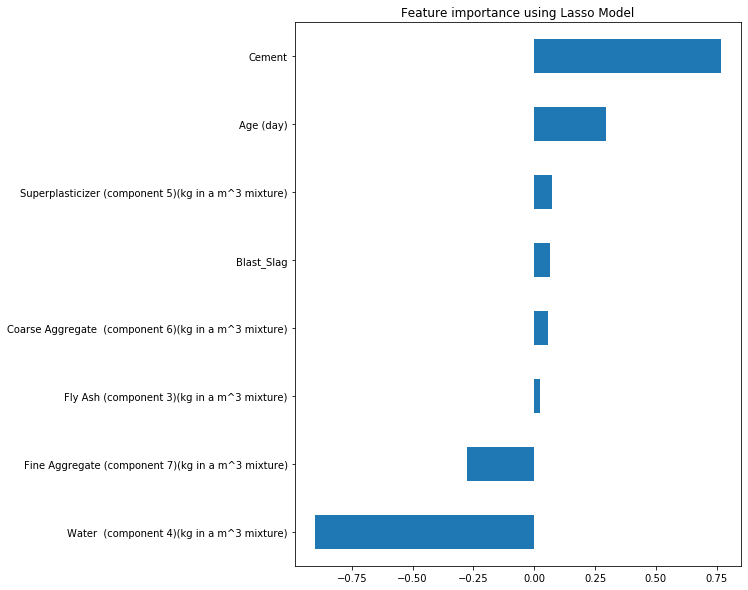

In [48]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

### VIF

In [49]:
## Building of simple OLS model.
X = df5.drop('Strength',1)
y = df5.Strength
X_constant = sm.add_constant(X)
model = sm.OLS(y, X_constant).fit()
predictions = model.predict(X_constant)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Strength   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     503.1
Date:                Sun, 30 Aug 2020   Prob (F-statistic):               0.00
Time:                        23:05:49   Log-Likelihood:                 22.813
No. Observations:                1030   AIC:                            -27.63
Df Residuals:                    1021   BIC:                             16.81
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    4.6373      2.286      2.028      0.043       0.151       9.124
Cement                                                   0.7640      0.032     24.012      0.000       0.702       0.826
Blast_Slag                                               0.0664      0.005     12.747      0.000       0.056       0.077
Fly Ash (component 3)(kg in a m^3 mixture)               0.0252      0.005      4.708      0.000       0.015       0.036
Water  (component 4)(kg in a m^3 mixture)               -0.9606      0.122     -7.873      0.000      -1.200      -0.721
Superplasticizer (component 5)(kg in a m^3 mixture)      0.0692      0.012      5.673      0.000       0.045       0.093
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0.0729      0.149      0.491      0.624      -0.219       0.365
Fine Aggregate (component 7)(kg in a m^3 mixture)       -0.3309      0.119     -2.788      0.005      -0.564      -0.098
Age (day)                                                0.2958      0.007     43.541      0.000       0.282       0.309
==============================================================================
Omnibus:                       62.365   Durbin-Watson:                   1.466
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               75.881
Skew:                          -0.578   Prob(JB):                     3.33e-17
Kurtosis:                       3.659   Cond. No.                     4.10e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.1e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [50]:
### calculating the vif values as multicollinearity exists (as stated by warning 2)

from statsmodels.stats.outliers_influence import variance_inflation_factor

[variance_inflation_factor(X.values, j) for j in range(1, X.shape[1])]

[3.453350110746776,
 4.945643786040581,
 2115.6972131979387,
 8.17682343556809,
 3487.5832488013566,
 2694.3872212574165,
 9.870443413766349]

In [51]:
# removing collinear variables
# function definition

def calculate_vif(x):
    thresh = 5.0
    output = pd.DataFrame()
    k = x.shape[1]
    vif = [variance_inflation_factor(x.values, j) for j in range(x.shape[1])]
    for i in range(1,k):
        print("Iteration no.")
        print(i)
        print(vif)
        a = np.argmax(vif)
        print("Max VIF is for variable no.:")
        print(a)
        if vif[a] <= thresh :
            break
        if i == 1 :          
            output = x.drop(x.columns[a], axis = 1)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
        elif i > 1 :
            output = output.drop(output.columns[a],axis = 1)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
    return(output)

In [52]:
## passing X to the function so that the multicollinearity gets removed.
train_out = calculate_vif(X)

Iteration no.
1
[314.385355207457, 3.453350110746776, 4.945643786040581, 2115.6972131979387, 8.17682343556809, 3487.5832488013566, 2694.3872212574165, 9.870443413766349]
Max VIF is for variable no.:
5
Iteration no.
2
[299.2285650496127, 3.4530300390886417, 4.87546326542385, 1728.024816998008, 8.147534074630975, 1437.9667657937948, 9.869934738248105]
Max VIF is for variable no.:
3
Iteration no.
3
[249.46973443896047, 2.777787803523224, 4.122360407901295, 4.914713902682457, 271.6298764312916, 9.474586297044414]
Max VIF is for variable no.:
4
Iteration no.
4
[11.412591995509567, 2.368430663939049, 3.1339036237709705, 4.610514158431349, 9.348781819330528]
Max VIF is for variable no.:
0
Iteration no.
5
[2.2743594074589404, 3.1311006052224077, 4.329572242264782, 2.8051652242360374]
Max VIF is for variable no.:
2


In [53]:
## includes only the relevant features
train_out.head()

,Blast_Slag,Fly Ash (component 3)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Age (day)
0,0.000000,0.0,1.252763,3.367296
1,0.000000,0.0,1.252763,3.367296
2,4.966335,0.0,0.000000,5.602119
3,4.966335,0.0,0.000000,5.902633
4,4.893352,0.0,0.000000,5.888878


## Regularization
### Ridge

In [54]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [55]:
# higher the alpha value, more restriction on the coefficients; 
# low alpha > more generalization, coefficients are barely
rr = Ridge(alpha=0.01) 
# restricted and in this case linear and ridge regression resembles
rr.fit(X_train, y_train)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [56]:
rr100 = Ridge(alpha=100) #  comparison with alpha value
rr100.fit(X_train, y_train)

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [57]:
train_score=lr.score(X_train, y_train)
test_score=lr.score(X_test, y_test)

In [58]:
Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)

In [59]:
Ridge_train_score100 = rr100.score(X_train,y_train)
Ridge_test_score100 = rr100.score(X_test, y_test)

In [60]:
print("linear regression train score:", train_score)
print("linear regression test score:", test_score)
print("ridge regression train score low alpha:", Ridge_train_score)
print("ridge regression test score low alpha:", Ridge_test_score)
print("ridge regression train score high alpha:", Ridge_train_score100)
print("ridge regression test score high alpha:", Ridge_test_score100)

linear regression train score: 0.794699237611186
linear regression test score: 0.802003531896633
ridge regression train score low alpha: 0.7946991058256725
ridge regression test score low alpha: 0.8019655473647247
ridge regression train score high alpha: 0.7008077838712079
ridge regression test score high alpha: 0.6869941636186863


### Lasso:

In [61]:
from sklearn.linear_model import Lasso

In [62]:
lasso = Lasso()
lasso.fit(X_train,y_train)
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)

In [63]:
print("training score:"), train_score 
print("test score: "), test_score
print("number of features used: "), coeff_used

training score:
test score: 
number of features used: 


(None, 0)

In [64]:
lasso001 = Lasso(alpha=0.01, max_iter=10e5)
lasso001.fit(X_train,y_train)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000000.0,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [65]:
train_score001=lasso001.score(X_train,y_train)
test_score001=lasso001.score(X_test,y_test)
coeff_used001 = np.sum(lasso001.coef_!=0)

In [66]:
print("training score for alpha=0.01:"), train_score001 
print("test score for alpha =0.01: "), test_score001
print("number of features used: for alpha =0.01:"), coeff_used001

training score for alpha=0.01:
test score for alpha =0.01: 
number of features used: for alpha =0.01:


(None, 5)

In [67]:
lasso00001 = Lasso(alpha=0.0001, max_iter=10e5)
lasso00001.fit(X_train,y_train)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000000.0,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [68]:
train_score00001=lasso00001.score(X_train,y_train)
test_score00001=lasso00001.score(X_test,y_test)
coeff_used00001 = np.sum(lasso00001.coef_!=0)

In [69]:
print("training score for alpha=0.0001:"), train_score00001 
print("test score for alpha =0.0001: "), test_score00001
print("number of features used: for alpha =0.0001:"), coeff_used00001

training score for alpha=0.0001:
test score for alpha =0.0001: 
number of features used: for alpha =0.0001:


(None, 8)

In [70]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lr_train_score=lr.score(X_train,y_train)
lr_test_score=lr.score(X_test,y_test)

In [71]:
print("LR training score:"), lr_train_score 
print("LR test score: "), lr_test_score

LR training score:
LR test score: 


(None, 0.802003531896633)

### Elastic Net

In [72]:
# Let's perform a cross-validation to find the best combination of alpha and l1_ratio
from sklearn.linear_model import ElasticNetCV, ElasticNet
from sklearn.metrics import r2_score

cv_model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, .995, 1], eps=0.001, n_alphas=100, fit_intercept=True, 
                        normalize=True, precompute='auto', max_iter=2000, tol=0.0001, cv=5, 
                        copy_X=True, verbose=0, n_jobs=-1, positive=False, random_state=None, selection='cyclic')

In [73]:
cv_model.fit(X_train, y_train)

ElasticNetCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
             l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 0.995, 1], max_iter=2000,
             n_alphas=100, n_jobs=-1, normalize=True, positive=False,
             precompute='auto', random_state=None, selection='cyclic',
             tol=0.0001, verbose=0)

In [74]:
print('Optimal alpha: %.8f'%cv_model.alpha_)
print('Optimal l1_ratio: %.3f'%cv_model.l1_ratio_)
print('Number of iterations %d'%cv_model.n_iter_)

Optimal alpha: 0.00002260
Optimal l1_ratio: 0.500
Number of iterations 25


In [75]:
# train model with best parameters from CV
model = ElasticNet(l1_ratio=cv_model.l1_ratio_, alpha = cv_model.alpha_, max_iter=cv_model.n_iter_, fit_intercept=True, normalize = True)
model.fit(X_train, y_train)

ElasticNet(alpha=2.2602603480576897e-05, copy_X=True, fit_intercept=True,
           l1_ratio=0.5, max_iter=25, normalize=True, positive=False,
           precompute=False, random_state=None, selection='cyclic', tol=0.0001,
           warm_start=False)

In [76]:
print(r2_score(y_test, model.predict(X_test))) # test data performance

0.8020147867206249
